In [159]:
import pandas as pd
import numpy as np
df = pd.read_csv("./pos/IndoorFingerprint.csv")
df.head()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI
0,2.0,8.0,-66,-92,-84,-84,-92,-93,-98,-96
1,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-96
2,2.0,8.0,-66,-94,-84,-84,-94,-93,-98,-100
3,2.0,8.0,-66,-94,-84,-84,-94,-80,-98,-100
4,2.0,8.0,-66,-94,-84,-84,-94,-74,-98,-100


In [194]:
df.tail()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI
6595,2.0,20.0,-98,-65,-94,-90,-101,-78,-99,-102
6596,2.0,20.0,-98,-68,-88,-99,-101,-78,-99,-102
6597,2.0,20.0,-92,-68,-88,-99,-101,-78,-99,-102
6598,2.0,20.0,-92,-69,-90,-99,-101,-79,-99,-102
6599,2.0,20.0,-92,-69,-88,-95,-101,-79,-99,-102


In [2]:
df.shape

(6600, 10)

In [164]:
0.3*6600

1980.0

In [195]:
aux = np.random.choice(np.arange(df.shape[0]),1980,replace=False)
aux

array([4141, 4492, 5891, ..., 5225, 1821, 2809])

In [196]:
np.savetxt('mask_test.csv',aux,delimiter=',',fmt='%i')

In [197]:
mask_test = np.loadtxt('mask_test.csv',dtype="i")
X_test = X[mask_test]
X_train = np.delete(X,mask_test,axis=0)
#same for labels y
X_train.shape

(4620, 10)

In [193]:
np.delete(X,mask_test,axis=0)

array([[   2.,    8.,  -66., ...,  -93.,  -98.,  -96.],
       [   2.,    8.,  -66., ...,  -93.,  -98., -100.],
       [   2.,    8.,  -66., ...,  -80.,  -98., -100.],
       ...,
       [   2.,   20.,  -98., ...,  -78.,  -99., -102.],
       [   2.,   20.,  -98., ...,  -78.,  -99., -102.],
       [   2.,   20.,  -92., ...,  -78.,  -99., -102.]])

In [87]:
print(df["X"].unique())
print(df["Y"].unique())

[ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42.]
[ 8. 12. 16. 20.]


#### Descripcion de etiquetas
C1hA =
0kxZ =
tvMX = Beacon (intensidad dBm)
OlYb =
7rk5 =
F39L =
VNSF = 
tkxl =

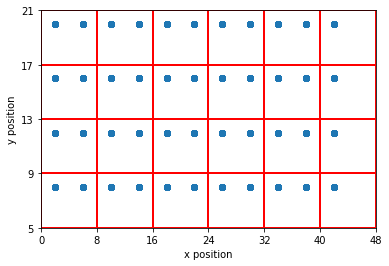

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2,pickradius=100)
plt.ylabel("y position")
plt.xlabel("x position")

#plt.grid(which='minor', alpha=0.9)
#plt.grid(which='major', alpha=0.9)
plt.show()

In [130]:
np.where(y_ticks>20)[0][0]

4

In [107]:
def between(array,number):
    for i in np.arange(len(array)-1):
        if(number > array[i]  and number < array[i+1] ):
            return i
    print(number)
between(x_ticks,5)

0

In [131]:
n_class = 24
y_labels = []
for x,y in zip(df["X"],df["Y"]):
    pos_x = np.where(x_ticks>x)[0][0]
    pos_y = np.where(y_ticks>y)[0][0]

    y_labels.append(str(pos_x)+'-'+str(pos_y))
y_labels = np.asarray(y_labels)

In [161]:
y_labels[-10:]

['1-4', '1-4', '1-4', '1-4', '1-4', '1-4', '1-4', '1-4', '1-4', '1-4']

In [160]:
df.tail()

,X,Y,C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI
6595,2.0,20.0,-98,-65,-94,-90,-101,-78,-99,-102
6596,2.0,20.0,-98,-68,-88,-99,-101,-78,-99,-102
6597,2.0,20.0,-92,-68,-88,-99,-101,-78,-99,-102
6598,2.0,20.0,-92,-69,-90,-99,-101,-79,-99,-102
6599,2.0,20.0,-92,-69,-88,-95,-101,-79,-99,-102


df["position"] = y_labels #position categorized
df.head()

In [148]:
y_final = pd.get_dummies(y_labels) #one hot vector of 24 posible class (grid)
y_final.head()

,1-1,1-2,1-3,1-4,2-1,2-2,2-3,2-4,3-1,3-2,...,4-3,4-4,5-1,5-2,5-3,5-4,6-1,6-2,6-3,6-4
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
#plot counts
import seaborn as sns
np.sum(y_final)
#sns.countplot(y_final)

1-1    300
1-2    300
1-3    300
1-4    300
2-1    300
2-2    300
2-3    300
2-4    300
3-1    300
3-2    300
3-3    300
3-4    300
4-1    300
4-2    300
4-3    300
4-4    300
5-1    300
5-2    300
5-3    300
5-4    300
6-1    150
6-2    150
6-3    150
6-4    150
dtype: int64

In [150]:
df.drop(["X","Y"],axis=1,inplace=True)
X_train = df.values
X_train

array([[ -66,  -92,  -84, ...,  -93,  -98,  -96],
       [ -66,  -94,  -84, ...,  -93,  -98,  -96],
       [ -66,  -94,  -84, ...,  -93,  -98, -100],
       ...,
       [ -92,  -68,  -88, ...,  -78,  -99, -102],
       [ -92,  -69,  -90, ...,  -79,  -99, -102],
       [ -92,  -69,  -88, ...,  -79,  -99, -102]])

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

/home/panshop/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [155]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dense(n_class,activation="softmax"))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy')
hist = model.fit(X_train_scaled, y_final.as_matrix(), epochs=300,verbose=1 )

Epoch 1/300
6600/6600 [==============================] - 1s 110us/step - loss: 2.7110
Epoch 2/300
6600/6600 [==============================] - 1s 105us/step - loss: 1.9473
Epoch 3/300
6600/6600 [==============================] - 1s 94us/step - loss: 1.4899
Epoch 4/300
6600/6600 [==============================] - 1s 92us/step - loss: 1.2261
Epoch 5/300
6600/6600 [==============================] - 1s 90us/step - loss: 1.0642
Epoch 6/300
6600/6600 [==============================] - 1s 90us/step - loss: 0.9558
Epoch 7/300
6600/6600 [==============================] - 1s 91us/step - loss: 0.8820
Epoch 8/300
6600/6600 [==============================] - 1s 137us/step - loss: 0.8271
Epoch 9/300
6600/6600 [==============================] - 1s 93us/step - loss: 0.7797
Epoch 10/300
6600/6600 [==============================] - 1s 99us/step - loss: 0.7436
Epoch 11/300
6600/6600 [==============================] - 1s 114us/step - loss: 0.7123
Epoch 12/300
6600/6600 [==============================] - 1

6600/6600 [==============================] - 1s 94us/step - loss: 0.1900
Epoch 97/300
6600/6600 [==============================] - 1s 129us/step - loss: 0.1876
Epoch 98/300
6600/6600 [==============================] - 1s 98us/step - loss: 0.1849
Epoch 99/300
6600/6600 [==============================] - 1s 100us/step - loss: 0.1839
Epoch 100/300
6600/6600 [==============================] - 1s 107us/step - loss: 0.1810
Epoch 101/300
6600/6600 [==============================] - 1s 99us/step - loss: 0.1790
Epoch 102/300
6600/6600 [==============================] - 1s 88us/step - loss: 0.1775
Epoch 103/300
6600/6600 [==============================] - 1s 91us/step - loss: 0.1764
Epoch 104/300
6600/6600 [==============================] - 1s 92us/step - loss: 0.1749
Epoch 105/300
6600/6600 [==============================] - 1s 103us/step - loss: 0.1719
Epoch 106/300
6600/6600 [==============================] - 1s 100us/step - loss: 0.1703
Epoch 107/300
6600/6600 [==============================

6600/6600 [==============================] - 1s 106us/step - loss: 0.1015
Epoch 190/300
6600/6600 [==============================] - 1s 91us/step - loss: 0.1009
Epoch 191/300
6600/6600 [==============================] - 1s 106us/step - loss: 0.1004
Epoch 192/300
6600/6600 [==============================] - 1s 90us/step - loss: 0.1001
Epoch 193/300
6600/6600 [==============================] - 1s 119us/step - loss: 0.1003
Epoch 194/300
6600/6600 [==============================] - 1s 94us/step - loss: 0.0991
Epoch 195/300
6600/6600 [==============================] - 1s 108us/step - loss: 0.0992
Epoch 196/300
6600/6600 [==============================] - 1s 87us/step - loss: 0.0987
Epoch 197/300
6600/6600 [==============================] - 1s 92us/step - loss: 0.0979
Epoch 198/300
6600/6600 [==============================] - 1s 103us/step - loss: 0.0974
Epoch 199/300
6600/6600 [==============================] - 1s 97us/step - loss: 0.0978
Epoch 200/300
6600/6600 [===========================

6600/6600 [==============================] - 1s 107us/step - loss: 0.0745
Epoch 284/300
6600/6600 [==============================] - 1s 106us/step - loss: 0.0732
Epoch 285/300
6600/6600 [==============================] - 1s 113us/step - loss: 0.0731
Epoch 286/300
6600/6600 [==============================] - 1s 119us/step - loss: 0.0733
Epoch 287/300
6600/6600 [==============================] - 1s 135us/step - loss: 0.0725
Epoch 288/300
6600/6600 [==============================] - 1s 124us/step - loss: 0.0732
Epoch 289/300
6600/6600 [==============================] - 1s 117us/step - loss: 0.0725
Epoch 290/300
6600/6600 [==============================] - 1s 135us/step - loss: 0.0727
Epoch 291/300
6600/6600 [==============================] - 1s 165us/step - loss: 0.0720
Epoch 292/300
6600/6600 [==============================] - 1s 123us/step - loss: 0.0721
Epoch 293/300
6600/6600 [==============================] - 1s 119us/step - loss: 0.0716
Epoch 294/300
6600/6600 [=====================